# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

0cc1c839f4ae95c2329f1205fd4977db


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        #print (city_data) 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Give server 10 seconds break in between each iteration
    time.sleep(10)
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | gadzhiyevo
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | einhausen
Processing Record 5 of Set 1 | prieska
Processing Record 6 of Set 1 | weno
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | celestun
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | yung shue wan
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,8.33,57,18,0.66,RU,1719877489
1,gadzhiyevo,69.2551,33.3362,8.51,92,100,4.00,RU,1719877499
2,adamstown,-25.0660,-130.1015,18.66,63,100,10.55,PN,1719877538
3,einhausen,49.6767,8.5483,15.82,91,70,0.84,DE,1719877548
4,prieska,-29.6641,22.7474,11.74,65,71,1.61,ZA,1719877558


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,8.33,57,18,0.66,RU,1719877489
1,gadzhiyevo,69.2551,33.3362,8.51,92,100,4.00,RU,1719877499
2,adamstown,-25.0660,-130.1015,18.66,63,100,10.55,PN,1719877538
3,einhausen,49.6767,8.5483,15.82,91,70,0.84,DE,1719877548
4,prieska,-29.6641,22.7474,11.74,65,71,1.61,ZA,1719877558


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

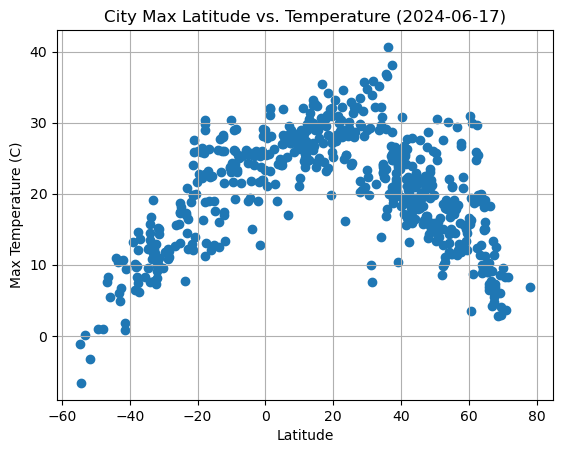

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = "o")   # YOUR CODE HERE
# Incorporate the other graph properties|# Add labels and title to plot
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Max Temperature (C)")
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

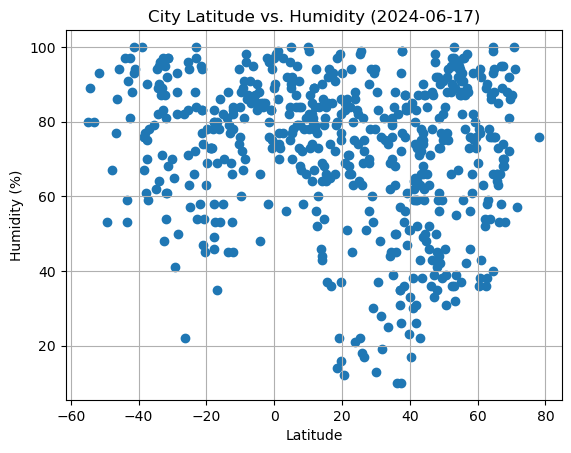

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = "o") # YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (2024-06-17)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

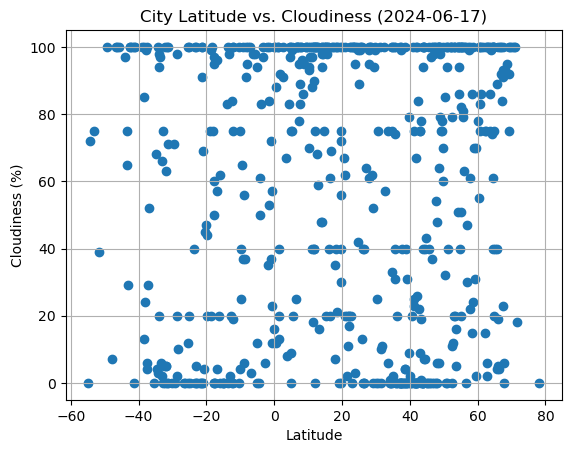

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = "o")   # YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':') 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

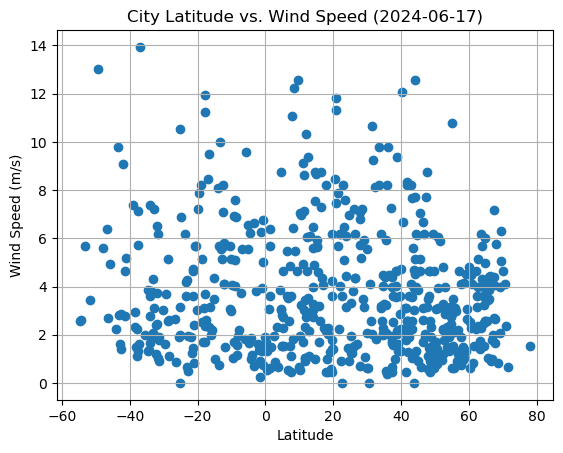

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = "o")   # YOUR CODE HERE

# Incorporate the other graph properties
plt.xlabel("Latitude")                                                      # YOUR CODE HERE
plt.ylabel("Wind Speed (m/s)")
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')        


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
#     plt.savefig('fig.png')
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]      # YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,8.33,57,18,0.66,RU,1719877489
1,gadzhiyevo,69.2551,33.3362,8.51,92,100,4.00,RU,1719877499
3,einhausen,49.6767,8.5483,15.82,91,70,0.84,DE,1719877548
5,weno,7.4515,151.8468,28.97,84,100,3.60,FM,1719877568
8,sitka,57.0531,-135.3300,12.94,88,100,4.63,US,1719877598


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]    # YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,18.66,63,100,10.55,PN,1719877538
4,prieska,-29.6641,22.7474,11.74,65,71,1.61,ZA,1719877558
6,bredasdorp,-34.5322,20.0403,9.53,94,4,1.34,ZA,1719877578
7,lebu,-37.6167,-73.6500,12.04,90,100,5.74,CL,1719877588
11,mount gambier,-37.8333,140.7667,9.78,61,99,1.13,AU,1719877628


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.700998448272511


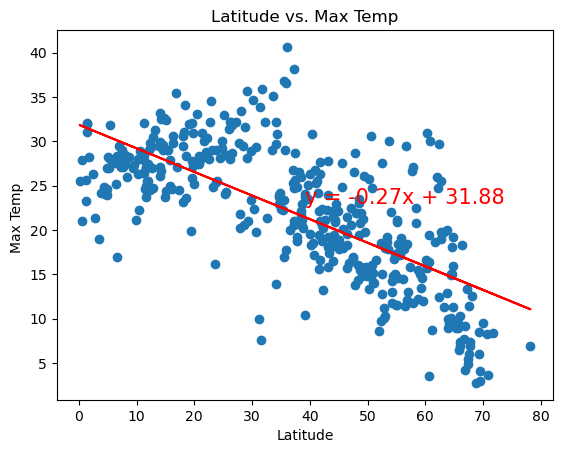

None


In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Max Temp"]
plt.title('Latitude vs. Max Temp')
plt.ylabel("Max Temp ")
# Save the figure
plt.savefig("output_data/Fig5.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.8269604231016942


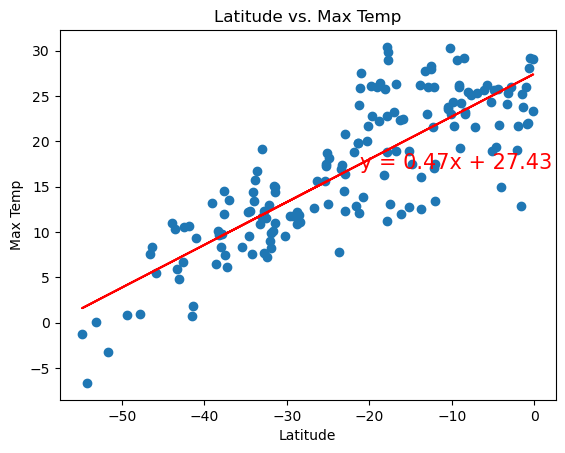

None


In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plt.title('Latitude vs. Max Temp')
# plt.savefig("output_data/Fig6.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Temperature vs. Latitude Linear Regression Plot
The slope of the regression line is -0.27  for the Northern Hemisphere; the lower the latitude, the higher the temperature in the Northern Hemisphere.
The slope of the regression line is +0.47,  for the Southern Hemisphere, the higher the latitude, the higher the temperature in the Southern Hemisphere. It also reveals 50% variability in the temperature-based latitude and the remaining 50% resulted from other factors not captured in the linear regression


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.04908380404866382


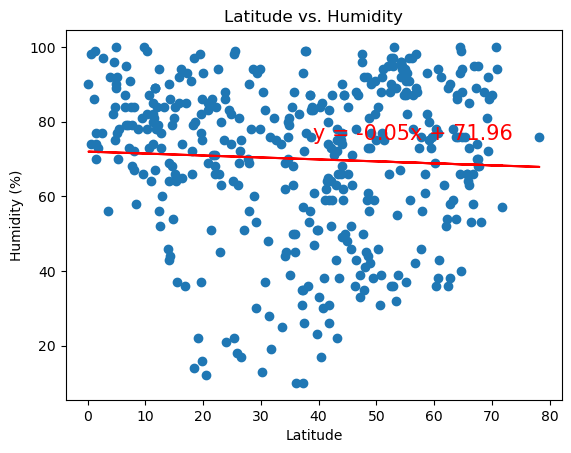

None


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
plt.title('Latitude vs. Humidity')
# plt.savefig("output_data/Fig7.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.009766257730677425


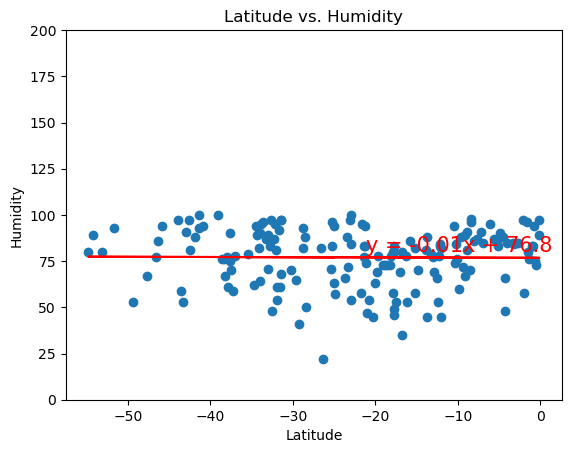

None


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]     # YOUR CODE HERE
y_values = southern_hemi_df["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity")
plt.title('Latitude vs. Humidity')
# plt.savefig("output_data/Fig8.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Humidity vs. Latitude Linear Regression Plot
The slope of the regression line is -0.05, for the Northern Hemisphere; the higher the latitude, the higher the % humidity in the Northern Hemisphere. 
The slope of the regression line is -0.01,  for the Southern Hemisphere; the latitude and the humidity are steady/with no major changes in the humidity and latitude in the Southern Hemisphere. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.06748672212301891


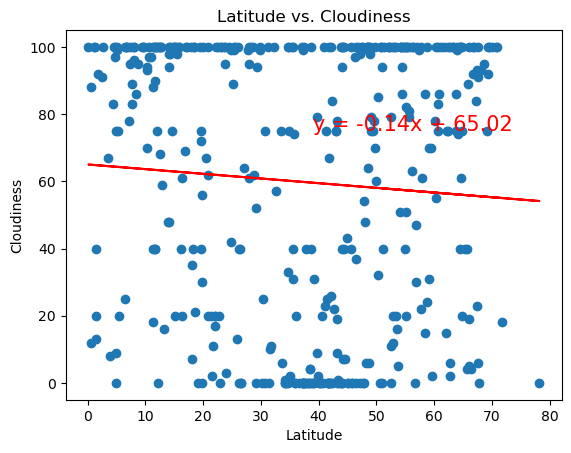

None


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title('Latitude vs. Cloudiness')
# plt.savefig("output_data/Fig9.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.020228517887075425


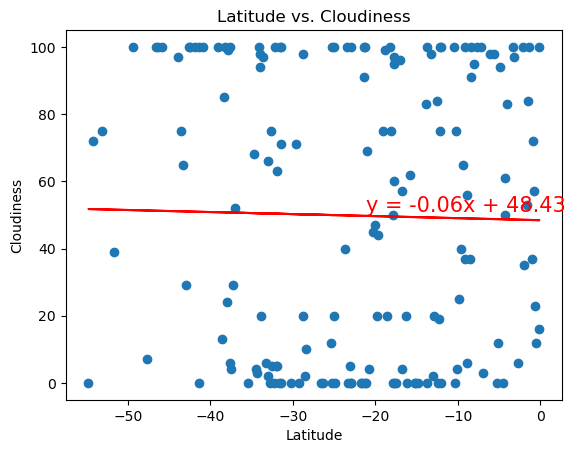

None


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title('Latitude vs. Cloudiness')
# plt.savefig("output_data/Fig10.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Cloudiness vs. Latitude Linear Regression Plot
The slopes of the regression lines are -0.14 and -0.06 in the Northern and Southern Hemisphere respectively (- slopes), showing that the higher the latitude, the higher the cloudiness, with low percentages variability based on latitudes respectively.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.1537077257934223


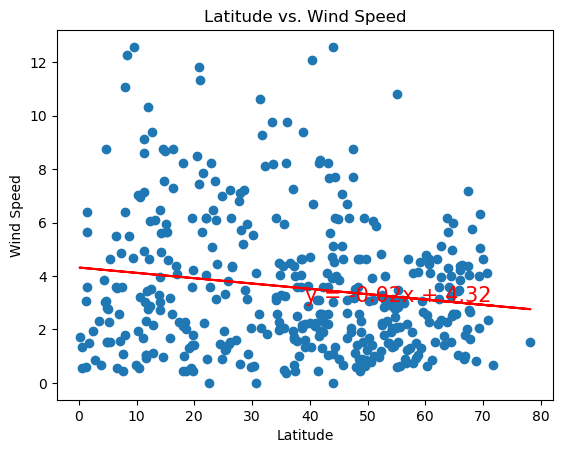

None


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title('Latitude vs. Wind Speed')
# plt.savefig("output_data/Fig11.png")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.03517704681988619


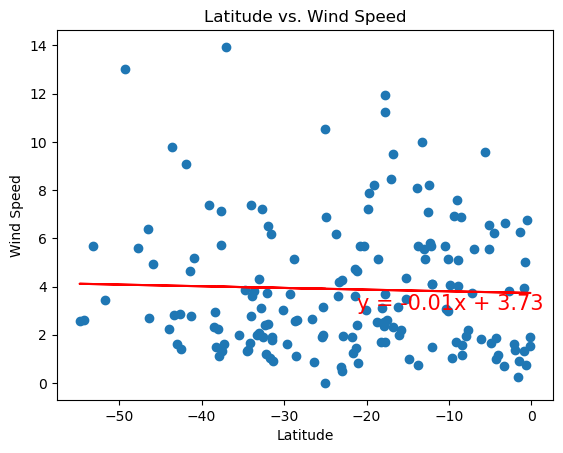

None


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]    # YOUR CODE HERE
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title('Latitude vs. Wind Speed')
# plt.savefig("output_data/Fig12.png")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** The slope of the regression line is -0.02; the wind speed increases as the latitude decreases for the Northern Hemisphere with a high percentage of variability in wind speed as the latitude decreases.
The slope of the regression line is -0.01; the wind speed increases as the latitude decreases for the Southern Hemisphere with low percentages of variability in wind speed as the latitude increases.
**Conclusion:**
Based on the above analysis, Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere.


